In [10]:
using Plots 
include("RBFunctions.jl")
using BenchmarkTools
using Symbolics
using Latexify
using CairoMakie

set up the problem 
compute L_I L_b matrices 
Compute P matrix 


In [288]:
const nu = 1.0
@variables ϵ r x₁ x₂ t;

#ϕ = 1//945 * ((ϵ*r)^5 +15*(ϵ*r)^3 + 105*(ϵ*r)^2 + 945*(ϵ*r)+ 945)* exp(-ϵ*r)
ϕ = exp(-r^2*ϵ^2)
ϕ = substitute(ϕ, r=>sqrt(x₁^2 + x₂^2)) 
display(ϕ)  
Δ(exprs) = expand_derivatives((Differential(x₁)^2)(exprs) + (Differential(x₂)^2)(exprs))
∂₁(exprs) = expand_derivatives(Differential(x₁)(exprs))
∂₂(exprs) = expand_derivatives(Differential(x₂)(exprs))
∂ₜ(exprs) = expand_derivatives(Differential(t)(exprs))
Φ_div = ([-∂₂(∂₂(ϕ)) ∂₁(∂₂(ϕ)); ∂₁(∂₂(ϕ)) -∂₁(∂₁(ϕ))])
Φ_curl = ([-∂₁(∂₁(ϕ)) -∂₁(∂₂(ϕ)); -∂₁(∂₂(ϕ)) -∂₂(∂₂(ϕ))])
Φ = [-Δ(ϕ) 0 ; 0 -Δ(ϕ)]
Φ_normal = [(ϕ) 0 ; 0 (ϕ)]
ΔΦ_div = ([-Δ(∂₂(∂₂(ϕ))) Δ(∂₁(∂₂(ϕ))); Δ(∂₁(∂₂(ϕ))) -Δ(∂₁(∂₁(ϕ)))])
display(Φ_div)
#a = [1 2;3 4]
Φ_div =eval(build_function(Φ_div, [x₁, x₂], ϵ)[1])
Φ_curl =eval(build_function(Φ_curl, [x₁, x₂], ϵ)[1])
Φ =eval(build_function(Φ, [x₁, x₂], ϵ)[1])
ΔΦ_div =eval(build_function(ΔΦ_div, [x₁, x₂], ϵ)[1])
Φ_normal =eval(build_function(Φ_normal, [x₁, x₂], ϵ)[1])
# reference solution 

true_u₁ = -x₂*π*sin(π*0.5*(x₁*x₁ + x₂*x₂))*sin(π*t)
true_u₂ =  x₁*π*sin(π*0.5*(x₁*x₁ + x₂*x₂))*sin(π*t)

true_∂ₜu₁ = ∂ₜ(true_u₁)
true_∂ₜu₂  = ∂ₜ(true_u₁)

true_p = sin(x₁-x₂+t)
true_Δp₁ = ∂₁(true_p)
true_Δp₂ = ∂₂(true_p)

f₁ = ∂ₜ(true_u₁) - nu*Δ(true_u₁) + true_Δp₁
f₂ = ∂ₜ(true_u₂) - nu*Δ(true_u₂) + true_Δp₂


display(true_∂ₜu₁)
display(true_∂ₜu₂)

f₁ = eval(build_function(f₁,x₁, x₂, t))
f₂ = eval(build_function(f₂,x₁, x₂, t))
true_u₁ = eval(build_function(true_u₁,x₁, x₂, t))
true_u₂ = eval(build_function(true_u₂,x₁, x₂, t))

#true_u₁ = eval(build_function(true_u₁,x₁, x₂, t))
#true_u₂ = eval(build_function(true_u₂,x₁, x₂, t))


true_p = eval(build_function(true_p,x₁, x₂, t))
true_Δp₁ = eval(build_function(true_Δp₁,x₁, x₂, t))
true_Δp₂ = eval(build_function(true_Δp₂,x₁, x₂, t))

true_∂ₜu₁ = eval(build_function(true_∂ₜu₁,x₁, x₂, t))
true_∂ₜu₂  = eval(build_function(true_∂ₜu₂,x₁, x₂, t))

print(true_Δp₁(2,0,1))



exp(-(ϵ^2)*(sqrt(x₁^2 + x₂^2)^2))

2×2 Matrix{Num}:
       (2//1)*(ϵ^2)*exp(-(ϵ^2)*(sqrt(x₁^2 + x₂^2)^2)) - (4//1)*(x₂^2)*(ϵ^4)*exp(-(ϵ^2)*(sqrt(x₁^2 + x₂^2)^2))  …  (4//1)*x₁*x₂*(ϵ^4)*exp(-(ϵ^2)*(sqrt(x₁^2 + x₂^2)^2))
 (4//1)*x₁*x₂*(ϵ^4)*exp(-(ϵ^2)*(sqrt(x₁^2 + x₂^2)^2))                                                                   (2//1)*(ϵ^2)*exp(-(ϵ^2)*(sqrt(x₁^2 + x₂^2)^2)) - (4//1)*(x₁^2)*(ϵ^4)*exp(-(ϵ^2)*(sqrt(x₁^2 + x₂^2)^2))

-9.869604401089358x₂*sin(1.5707963267948966(x₁^2) + 1.5707963267948966(x₂^2))*cos(πt)

-9.869604401089358x₂*sin(1.5707963267948966(x₁^2) + 1.5707963267948966(x₂^2))*cos(πt)

-0.9899924966004454

In [91]:
#generate mesh 
using DistMesh2D
#d(p) = sqrt(sum(p.^2))-1
#p,t = distmesh(d,HUniform,0.2)
fdistance(p) = sqrt(sum(p .^ 2)) - 1
fedgelength(p) = 1/(sqrt(sum(p .^ 2))+1)
boundingbox = [-1.1 -1.1; 1.1 1.1]
initdistance = 0.1
x, y = distmesh2d(fdistance, fedgelength, boundingbox, initdistance)


([-0.7499726277276153, -0.6876493311238373, NaN, -0.5753872757058334, -0.6876493311238373, NaN, -0.5753872757058334, -0.555036061924317, NaN, -0.4808754289905524  …  NaN, 0.7423233187344128, 0.8081852992609208, NaN, 0.7423233187344128, 0.6522164146435548, NaN, 0.7423233187344128, 0.6679496547322658, NaN], [-0.6614688623859607, -0.7260429716610987, NaN, -0.7320191531502623, -0.7260429716610987, NaN, -0.7320191531502623, -0.8318262856601667, NaN, -0.8767889266810731  …  NaN, 0.6700418563867655, 0.5889282820716366, NaN, 0.6700418563867655, 0.66328572534598, NaN, 0.6700418563867655, 0.744206461583933, NaN])

In [302]:
# generate points, reference solution, forcing vector, and boundary conditions 
tx = unique(filter(e -> !isequal(e,NaN) ,x))
ty = unique(filter(e -> !isequal(e,NaN) ,y))
println(length(tx)," ",length(ty))
points = hcat(tx,ty)'
Internal_points = []
Boundary_points = []
suma = 0
for i in 1:length(tx)
    if abs(sum(points[:,i] .^2) - 1) < 1e-8
        #println(i)
        suma +=1
        append!(Boundary_points,[points[:,i]])
    else
        append!(Internal_points,[points[:,i]])
    end
    
end

Internal_points = hcat(Internal_points...)
Boundary_points = hcat(Boundary_points...)
All_points = hcat(Internal_points,Boundary_points)
N_i = size(Internal_points)[2]
N_b = size(Boundary_points)[2]
N = N_i + N_b

function generate_vector_function(func::Function,points) 
    N = size(points)[2]
    res = zeros(N)
    x = points[1,:]
    y = points[2,:]
    function aa(time)
        return func.(x,y,Ref(time))
    end
    return aa
end

function generate_vector_function(func1::Function,func2::Function,points) 
    N = size(points)[2]
    x = points[1,:]
    y = points[2,:]
    function aa(time)
        res = zeros(2*N) # prealocate resulting vector
        for i in 1:N
            res[2i-1] = func1(x[i],y[i],time)
            res[2i] = func2(x[i],y[i],time)
        end
        return res
    end
    return aa # return function
end

#scatter(Internal_points[1,:],Internal_points[2,:],aspect_ratio=:equal)
#scatter!(Boundary_points[1,:],Boundary_points[2,:],aspect_ratio=:equal)
#@time u1(1)
tst1 = generate_vector_function(true_u₁,Internal_points)
tst2 = generate_vector_function(true_u₁,true_u₂,Internal_points)
println(length(tst1(100.0)))
println(length(tst2(100.0)))
ux_true = generate_vector_function(true_u₁,Internal_points)
uy_true = generate_vector_function(true_u₂,Internal_points)
u_true_internal = generate_vector_function(true_u₁,true_u₂,Internal_points)
g = generate_vector_function(true_u₁,true_u₂,Boundary_points) # function values on the boundary 
f = generate_vector_function(f₁,f₂,Internal_points) # forcing function on the domain 
∇p = generate_vector_function(true_Δp₁,true_Δp₂,Internal_points) # forcing function on the domain 
∂ₜg = generate_vector_function(true_∂ₜu₁,true_∂ₜu₂,Boundary_points)


358 358
294
588


(::var"#aa#1074"{var"#1047#1048", var"#1049#1050", Vector{Float64}, Vector{Float64}, Int64}) (generic function with 1 method)

In [106]:


time = Observable(0.0)
xs = Internal_points[1,:]
ys = Internal_points[2,:]
us = @lift ux_true($time)
vs = @lift uy_true($time)
title = @lift string(round($time, digits=2))
strength2 = @lift (sqrt.(ux_true($time+0.01) .^ 2 .+ uy_true($time+0.01) .^ 2) )

fig = Figure(resolution = (800, 800))
Axis(fig[1, 1], backgroundcolor = "black",title = title)
arrows!(xs, ys, us, vs, arrowsize = 10, lengthscale = 0.2, arrowcolor = strength2, linecolor = strength2) #, 
framerate = 30
timestamps = range(0.0, 2π, step=1/framerate)
record(fig, "time_animation.gif", timestamps; framerate = framerate) do ti
    time[] = ti
end
print(strength2)

Observable{Vector{Float64}} with 2 listeners. Value:
[2.185540621213016, 2.1153577067438607, 2.2108353598376946, 1.7240328436180277, 1.3018537875350582, 1.8790127201950602, 1.7336739307205422, 1.8855343400646576, 2.117571144289743, 1.4843448297636468, 2.1972691980416266, 1.8990158843946066, 2.164230061074157, 2.1526669514365424, 1.4423652812686183, 1.0781002318814952, 1.1330250565258688, 2.1526669526669417, 1.5230064293260286, 1.4423652809223442, 2.1642300602174314, 1.8990158857499562, 1.824169776452312, 1.5230064307340454, 1.133025055801209, 1.8241697767630034, 1.8063439346348344, 2.115357706023273, 1.4843448286099359, 1.7336739296204409, 1.8790127183131071, 1.3018537877632974, 2.1175711433211326, 1.8855343369650917, 2.185540618190807, 1.724032843585801, 2.210835360398468, 2.197269196756738, 2.141510274129626, 2.171944821554748, 1.864501009267548, 2.1721316614873105, 2.140989356822219, 2.150914553304577, 1.7899928099709923, 1.433237767730371, 1.7907682550868231, 1.8076751966613374, 1.

In [145]:
#Plots.scatter(Internal_points[1,:],Internal_points[2,:],aspect_ratio=:equal)
#Plots.scatter!(Boundary_points[1,:],Boundary_points[2,:],aspect_ratio=:equal)

In [153]:
function apply_matrix(func, tensor, param)
    res = apply(func, tensor,param)
    #display(res)
    return [res[(i+1)÷2,(j+1)÷2][i%2+1,j%2+1] for i = 1: size(res)[1]*2 , j = 1:size(res)[2]*2]
end
test_tensor = point_difference_tensor(Internal_points[:,1:5],Internal_points[:,1:10])
#apply_matrix(Φ_normal, test_tensor, 10)


10×20 Matrix{Float64}:
 1.0          0.0          …  0.0          0.00500023  0.0
 0.0          1.0             0.409412     0.0         0.00500023
 0.000346285  0.0             0.0          0.0547018   0.0
 0.0          0.000346285     0.0293812    0.0         0.0547018
 7.49117e-7   0.0             0.0          0.00254245  0.0
 0.0          7.49117e-7   …  0.000367019  0.0         0.00254245
 0.000174891  0.0             0.0          0.312399    0.0
 0.0          0.000174891     0.0147151    0.0         0.312399
 1.14607e-5   0.0             0.0          0.30475     0.0
 0.0          1.14607e-5      0.00106242   0.0         0.30475

In [319]:
param = 4
tensor_internal_internal = point_difference_tensor(Internal_points,Internal_points)
tensor_internal_all = point_difference_tensor(Internal_points,All_points)
tensor_all_all = point_difference_tensor(All_points,All_points)
tensor_internal_boundary = point_difference_tensor(Internal_points,Boundary_points)
tensor_boundary_boundary = point_difference_tensor(Boundary_points,Boundary_points)
"""
A_internal = apply_matrix(Φ, tensor_internal_internal, param)
A_div_internal = apply_matrix(Φ_div, tensor_internal_internal, param)
B = apply_matrix(ΔΦ_div, tensor_internal_all, param)
A_div = apply_matrix(Φ_div, tensor_all_all, param)
L = B*inv(A_div)
L_i = L[:,1:2*N_i]
L_b = L[:,2*N_i+1:end]
P = A_div_internal*inv(A_internal)
"""
# from the paper 
A = apply_matrix(Φ, tensor_internal_internal, param)
A_div = apply_matrix(Φ_div, tensor_internal_internal, param)
B = apply_matrix(Φ_div, tensor_internal_boundary, param)
C = apply_matrix(Φ_div, tensor_boundary_boundary, param)
AA = vcat(hcat(A,B),hcat(B',C))
AB = hcat(A_div,B)
Px = AB*inv(AA)
Pi = Px[:,1:2*N_i]
Pb = Px[:,2*N_i+1:end]

Ax = apply_matrix(Φ_normal, tensor_all_all, param)
AL = -1 * apply_matrix(Φ, tensor_all_all, param)
L = AL*inv(Ax)
Li = L[1:2*N_i,1:2*N_i]
Lb = L[1:2*N_i,2*N_i+1:end]
#display(L_i)
#display(L_b)

fig = Figure(resolution = (800, 800))
ax  =Axis(fig[1,1])
hm = CairoMakie.heatmap!(ax,B)
CairoMakie.Colorbar(fig[1,2], hm)
fig
println(cond(Pi*L_i))
println(maximum(real.(eigvals(Pi*L_i))))

3.00363534055264e14
4.0787524092619756e-7


In [368]:
# this cell is for testing out usual div-free interpolation of a known vector field 

tst_param = 3.5

tst_points = generate_2D_equally_spaced_points(40)[1]
println("length tst points", length(tst_points))

mask = sqrt.(sum(tst_points .^2 ,dims=1))
mask = mask .< 1
tst_points = tst_points .* mask
inside = findall(sum(tst_points , dims=1) .== 0)
tst_points = tst_points[:, setdiff(1:size(tst_points, 2), inside)]


tst_tensor = point_difference_tensor(tst_points,Internal_points)
FF = apply_matrix(Φ_normal,tst_tensor,tst_param)
GG = apply_matrix(Φ_normal,tensor_internal_internal,tst_param)
println("cond number ",cond(GG))

interpolant = FF*inv(GG)*u_true_internal(1.3)
true_func = generate_vector_function(true_u₁,true_u₂,tst_points)(1.3)
println("maximum error: ",maximum(true_func .- interpolant))
println("Max value of treu velocity:", maximum(u_true_internal(1.3)))


#Plots.scatter(tst_points[1,:],tst_points[2,:],aspect_ratio=:equal)

length tst points2888
cond number 2.542420812260957e9
maximum error: 0.008824935298613612
Max value of treu velocity:2.3236927163632286


In [307]:
using DifferentialEquations
using Sundials
function f1!(du,u,p,t) # my version
    L_i = p[1]
    L_b = p[2]
    P = p[3]
    force = p[4]
    bc = p[5]
    
    du .=  (L_i * u .+ L_b * bc(t) .+ force(t) .- pressure(t))
    #return du
end

function f2!(du,u,p,t) # paper version
    Li,Lb,Pi,Pb,f,g,∂ₜg, ∇p = p

    du .=   (Li * u .+ Lb * g(t) .+ f(t) .- ∇p(t) ) #.+ Pb*∂ₜg(t)
end

u0 = u_true_internal(0)
tspan = (0.0,2*π)
prob1 = ODEProblem(f1!,u0,tspan,[L_i,L_b,P,f,g])
prob2 = ODEProblem(f2!,u0,tspan,[Li,Lb,Pi,Pb,f,g,∂ₜg,∇p])
sol = solve(prob2,ImplicitEuler())
println("done")

done


In [305]:
println(maximum(abs.(sol(1.3) - u_true_internal(1.3))))
println(maximum(vcat(sol[:]...)))
println(maximum(vcat(u_true_internal.(0:0.1:6.28)...)))
maximum(abs.(vcat(u_true_internal.(0:0.01:6.28)...) - vcat(sol(0:0.01:6.28)...)))


0.03781457564610413
2.9120331942753857
2.872242156246089


0.0486891067429025

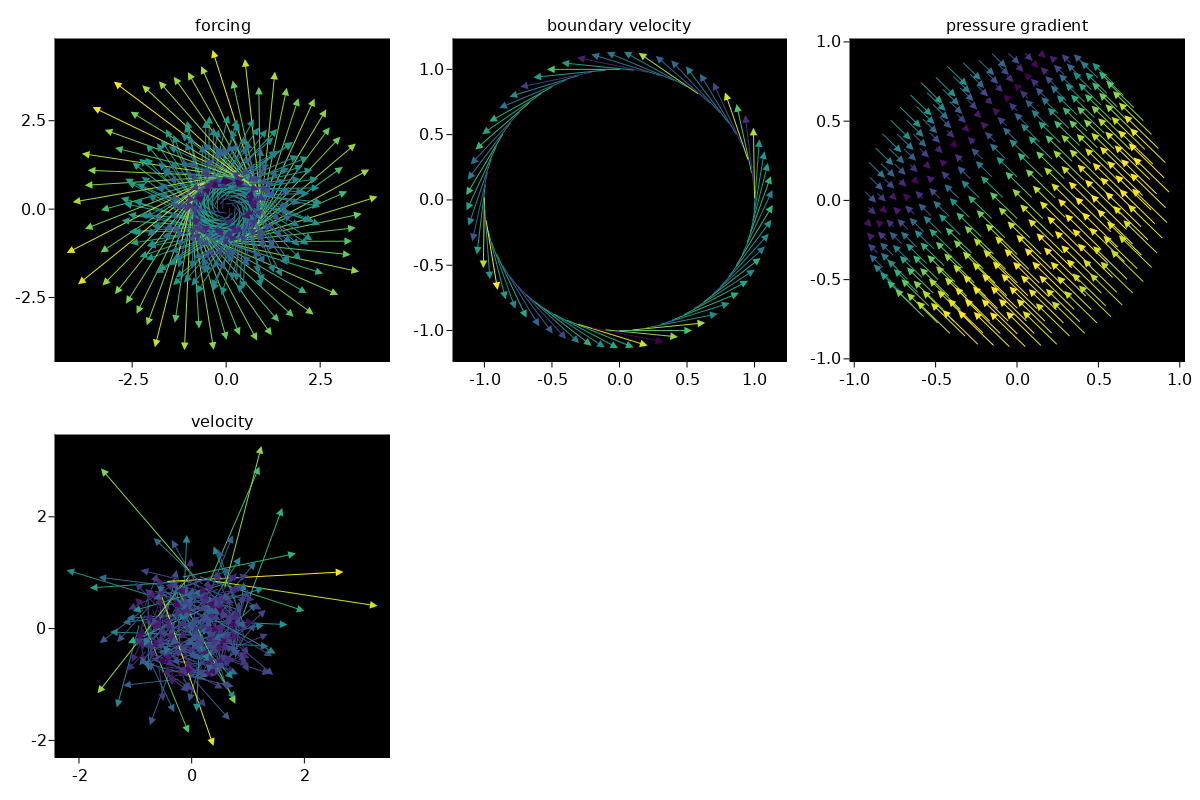

In [301]:

t_interest = 2.3
xsi = Internal_points[1,:]
ysi = Internal_points[2,:]

u = sol(t_interest)[1:2:2*N_i]
v = sol(t_interest)[2:2:2*N_i]

usi = f(t_interest)[1:2:2*N_i]
vsi = f(t_interest)[2:2:2*N_i]

up = Δp(t_interest)[1:2:2*N_i]
vp = Δp(t_interest)[2:2:2*N_i]

xsb = Boundary_points[1,:]
ysb = Boundary_points[2,:]
usb = g(t_interest)[1:2:2*N_b]
vsb = g(t_interest)[2:2:2*N_b]

strengthi = (sqrt.( usi.^ 2 .+  vsi.^ 2) )
strengthb = (sqrt.( usb.^ 2 .+  vsb.^ 2) )
strengthp = (sqrt.( (up.+0.0).^ 2 .+  (vp .+0.0).^ 2) )
strengthsol = (sqrt.( (u.+0.0).^ 2 .+  (v .+0.0).^ 2) )

fig = Figure(resolution = (3*400, 2*400))
subfig1 = fig[1, 1] = GridLayout()
subfig2 = fig[1, 2] = GridLayout()
subfig3 = fig[1, 3] = GridLayout()
subfig4 = fig[2, 1] = GridLayout()
ax1 = Axis(subfig1[1, 1], backgroundcolor = "black",title = "forcing")
ax2 = Axis(subfig2[1, 1], backgroundcolor = "black",title = "boundary velocity")
ax3 = Axis(subfig3[1, 1], backgroundcolor = "black",title = "pressure gradient")
ax4 = Axis(subfig4[1, 1], backgroundcolor = "black",title = "velocity")
arrows!(ax1,xsi, ysi, usi, vsi, arrowsize = 10, lengthscale = 0.2, arrowcolor = strengthi, linecolor = strengthi) #,
arrows!(ax2,xsb, ysb, usb, vsb, arrowsize = 10, lengthscale = 0.2, arrowcolor = strengthb, linecolor = strengthb) #,
arrows!(ax3,xsi, ysi, up, vp, arrowsize = 10, lengthscale = 0.2, arrowcolor = strengthp, linecolor = strengthp) #,
arrows!(ax4,xsi, ysi,u , v, arrowsize = 10, lengthscale = 0.2, arrowcolor = strengthsol, linecolor = strengthsol)
fig
#save("testingg.png",fig)

#println(up .^2 .+ vp .^2)

In [276]:
time = Observable(0.0)
xs = Internal_points[1,:]
ys = Internal_points[2,:]
us = @lift sol($time)[1:2:2*N_i]
vs = @lift sol($time)[2:2:2*N_i]
title = @lift string(round($time, digits=2))
strength2 = @lift sqrt.(sol($time+0.01)[1:2:2*N_i] .^ 2 .+ sol($time+0.01)[2:2:2*N_i] .^ 2) 

fig = Figure(resolution = (800, 800))
Axis(fig[1, 1], backgroundcolor = "black",title = title)
arrows!(xs, ys, us, vs, arrowsize = 10, lengthscale = 0.05, arrowcolor = strength2, linecolor = strength2) #, 
framerate = 30
timestamps = range(0.0, 2π, step=1/framerate)
record(fig, "my_method.gif", timestamps; framerate = framerate) do ti
    time[] = ti
end


"my_method.gif"